In [4]:
from sklearn.svm import SVC
import sklearn.neural_network as nn
import sklearn.model_selection
import sklearn.metrics as metrics
import numpy as np
import sklearn.neighbors as neighbors
import time
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784') 

In [5]:
trainsize=0.7
size=10000
data=np.random.randint(70000, size=size)
xtrain, xtest, ytrain, ytest = sklearn.model_selection.train_test_split(mnist.data[data], mnist.target[data],
train_size=trainsize)

KNN : scoretest=0.94
KNN : scoretrain=0.971
[[302   0   0   0   0   1   1   0   0   0]
 [  0 344   3   0   0   0   0   0   0   0]
 [  6   7 252   2   0   1   2  10   3   1]
 [  0   2   5 274   0   4   0   0   1   2]
 [  2   7   1   0 292   0   5   0   0  10]
 [  2   1   0  11   0 263   5   0   1   0]
 [  3   1   0   0   0   1 298   0   0   0]
 [  0  15   1   0   1   0   2 276   0   4]
 [  1   9   2   5   3   6   0   4 248   3]
 [  2   2   0   4   5   0   0  10   0 271]]
ANN : scoretest=0.9246666666666666
ANN : scoretrain=0.9908571428571429
[[290   0   5   2   1   2   2   0   0   2]
 [  1 340   1   0   0   2   0   0   2   1]
 [  3   1 259   4   6   0   2   2   4   3]
 [  1   2   8 264   0   6   0   0   6   1]
 [  0   3   3   0 298   0   4   0   3   6]
 [  2   8   0   4   0 258   4   1   4   2]
 [  2   1   5   1   3   4 283   0   4   0]
 [  2   6   4   3   2   0   0 275   2   5]
 [  1  10   4   4   2   2   2   0 254   2]
 [  0   0   0   5  14   0   0  19   3 253]]
SVM : scoretest=0.939
S

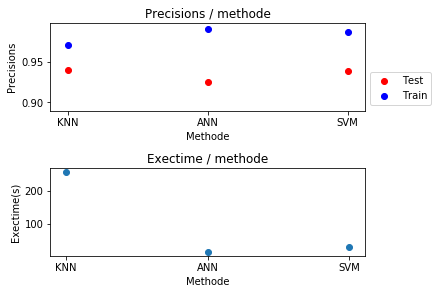

In [9]:
scoreTest=[]
scoreTrain=[]
times=[]

# KNN
start=time.time()
clf = neighbors.KNeighborsClassifier(3,n_jobs=-1,p=3)
clf.fit(xtrain, ytrain)
tempscore=clf.score(xtest,ytest)
scoreTest.append(tempscore)
print("KNN : scoretest="+str(tempscore))
tempscore=clf.score(xtrain,ytrain)
scoreTrain.append(tempscore)
print("KNN : scoretrain="+str(tempscore))
length=time.time()-start
times.append(length)
print(metrics.confusion_matrix(ytest,clf.predict(xtest)))
# ANN
start=time.time()
clf = nn.MLPClassifier(hidden_layer_sizes=(50,)*20,solver='adam')
clf.fit(xtrain, ytrain)
tempscore=clf.score(xtest,ytest)
scoreTest.append(tempscore)
print("ANN : scoretest="+str(tempscore))
tempscore=clf.score(xtrain,ytrain)
scoreTrain.append(tempscore)
print("ANN : scoretrain="+str(tempscore))
length=time.time()-start
times.append(length)
print(metrics.confusion_matrix(ytest,clf.predict(xtest)))
# SVM
start=time.time()
clf = SVC(kernel='poly',gamma='scale',C=1)
clf.fit(xtrain, ytrain)
tempscore=clf.score(xtest,ytest)
scoreTest.append(tempscore)
print("SVM : scoretest="+str(tempscore))
tempscore=clf.score(xtrain,ytrain)
scoreTrain.append(tempscore)
print("SVM : scoretrain="+str(tempscore))
length=time.time()-start
times.append(length)
print(metrics.confusion_matrix(ytest,clf.predict(xtest)))

plt.subplot(2,1,1)
plt.scatter(('KNN','ANN','SVM'),scoreTest,c='r',label='Test')
plt.title("Precisions / methode")
plt.xlabel("Methode")
plt.ylabel("Precisions")
plt.scatter(('KNN','ANN','SVM'),scoreTrain,c='b',label='Train')
plt.legend(loc='upper left',bbox_to_anchor=(1,0.5))
plt.subplot(2,1,2)
plt.scatter(('KNN','ANN','SVM'),times)
plt.title("Exectime / methode")
plt.xlabel("Methode")
plt.ylabel("Exectime(s)")
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
plt.show()